# **Import Required Libraries**

In [21]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os
import random
import torchmetrics
from tqdm.notebook import tqdm_notebook as tqdm

# **Setting Seed**

In [22]:
np.random.seed(42)

random.seed(42)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)  
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

os.environ['PYTHONHASHSEED'] = str(42)

# **Filters**

In [23]:
# Define the original filter
filters = [
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, -1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, -1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, -1, 0, 0],
    [0, 0, 3, 0, 0],
    [0, 0, -3, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [-1, 0, 0, 0, 0],
    [0, 3, 0, 0, 0],
    [0, 0, -3, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-1, 3, -3, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, -3, 0, 0],
    [0, 3, 0, 0, 0],
    [-1, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, -3, 0, 0],
    [0, 0, 3, 0, 0],
    [0, 0, -1, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, -3, 0, 0],
    [0, 0, 0, 3, 0],
    [0, 0, 0, 0, -1]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, -3, 3, -1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, -1],
    [0, 0, 0, 3, 0],
    [0, 0, -3, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, -2, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, -2, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, -2, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, -2, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, -1, 2, -1, 0],
    [0, 2, -4, 2, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, -1, 2, 0, 0],
    [0, 2, -4, 0, 0],
    [0, -1, 2, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0 ,0, 0, 0],
    [0, 2, -4, 2, 0],
    [0, -1, 2, -1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 2, -1, 0],
    [0, 0, -4, 2, 0],
    [0, 0, 2, -1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [-1, 2, -2, 2, -1],
    [2, -6, 8, -6, 2],
    [-2, 8, -12, 8, -2],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [-1, 2, -2, 0, 0],
    [2, -6, 8, 0, 0],
    [-2, 8, -12, 0, 0],
    [2, -6, 8, 0, 0],
    [-1, 2, -2, 0, 0]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-2, 8, -12, 8, -2],
    [2, -6, 8, -6, 2],
    [-1, 2, -2, 2, -1]]),
    np.array([
    [0, 0, -2, 2, -1],
    [0, 0, 8, -6, 2],
    [0, 0, -12, 8, -2],
    [0, 0, 8, -6, 2],
    [0, 0, -2, 2, -1]]),
    np.array([
    [0, 0, 0, 0, 0],
    [0, -1, 2, -1, 0],
    [0, 2, -4, 2, 0],
    [0, -1, 2, -1, 0],
    [0, 0, 0, 0, 0]]),
    np.array([
    [-1, 2, -2, 2, -1],
    [2, -6, 8, -6, 2],
    [-2, 8, -12, 8, -2],
    [2, -6, 8, -6, 2],
    [-1, 2, -2, 2, -1]])
]

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# **Image Preprocessing**

In [25]:
def normal_patches(image, patch_size):
    # Extract height and width of the image
    height, width = image.shape[:2]
    
    # Create an empty list to store patches
    patches = [
        # Extract patches of size (patch_size x patch_size) from the image
        image[i:i + patch_size, j:j + patch_size]
        for i in range(0, height, patch_size)  # Iterate over rows with step size = patch_size
        for j in range(0, width, patch_size)   # Iterate over columns with step size = patch_size
    ]
    return patches  # Return the list of extracted patches

In [26]:
def reconstruct(patches):
    # Flatten each patch along its spatial dimensions and combine into a single array
    row_patches = np.concatenate(
        [patch.reshape(-1, 3) for patch in patches], axis=0
    )
    
    # Reshape the concatenated patches back into the original image format
    combined_image = row_patches.reshape(32, 16, 3)  # Assuming image dimensions are known (32x16x3)
    return combined_image  # Return the reconstructed image

In [27]:
def texture_diversity(image):
    M = image.shape[0]
    ldiv = 0  # Initialize the diversity score

    # Loop through each color channel
    for channel in range(3):
        patch = image[:, :, channel]  # Extract a single channel (R, G, or B)
        
        # Calculate the absolute differences between neighboring pixels along different axes
        ldiv += np.abs(patch[:, :-1] - patch[:, 1:]).sum()  # Horizontal differences
        ldiv += np.abs(patch[:-1, :] - patch[1:, :]).sum()  # Vertical differences
        ldiv += np.abs(patch[:-1, :-1] - patch[1:, 1:]).sum()  # Diagonal (top-left to bottom-right)
        ldiv += np.abs(patch[1:, :-1] - patch[:-1, 1:]).sum()  # Diagonal (top-right to bottom-left)
    
    return ldiv  # Return the accumulated diversity score

In [28]:
def plot_images(images):
    num_images = len(images)  
    plt.figure(figsize=(15, 5))
    
    for i, image in enumerate(images): 
        plt.subplot(1, num_images, i+1)
        plt.imshow(image) 
        plt.axis('off')
    
    plt.show

In [29]:
def smash_reconstruction(image, patch_size=8, rich_ratio=0.5):
    
    patches = normal_patches(image, patch_size)
    patches.sort(key=texture_diversity, reverse=True)
    
    # Split patches into rich and poor texture based on sorted texture diversity
    num_rich = int(len(patches) * rich_ratio)
    rich_texture = [patches[i] for i in range(num_rich)]
    poor_texture = [patches[i] for i in range(num_rich, len(patches))]
    
    rich_image = reconstruct(rich_texture)
    poor_image = reconstruct(poor_texture)
    
    return rich_image, poor_image

In [30]:
def high_pass(image):
    filtered_images = []  # Initialize a list to store the filtered images
    
    for kernel in filters:  # Loop through each kernel in the filters list
        # Split the image into B, G, R channels
        b_channel, g_channel, r_channel = cv2.split(image)
        
        # Apply the filter to each channel
        b_filtered = cv2.filter2D(b_channel, -1, kernel)
        g_filtered = cv2.filter2D(g_channel, -1, kernel)
        r_filtered = cv2.filter2D(r_channel, -1, kernel)
        
        # Merge the filtered channels back into a single image
        filtered_image = cv2.merge([b_filtered, g_filtered, r_filtered])
        
        # Add the filtered image to the list
        filtered_images.append(filtered_image)

    return filtered_images  # Return the list of filtered images

In [31]:
def concat_high_pass(filtered_images):
    return np.concatenate(np.array(filtered_images), axis=-1)

In [32]:
def plot_images(image, filtered_images):
    # Set up the figure for a row of subplots
    num_images = len(filtered_images) + 1  # Original image + filtered images
    plt.figure(figsize=(15, 5))
    
    # Plot the original image
    plt.subplot(1, num_images, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.axis('off')
    
    # Plot each filtered image in a row
    for i, filtered_image in enumerate(filtered_images, start=2):
        plt.subplot(1, num_images, i)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)) 
        plt.axis('off')

    plt.show()

# **Label Mapping and Data Processing**

In [17]:
import os
import shutil
from PIL import Image

source_dir = "/kaggle/input/tiny-genimage"
destination_dir = "/kaggle/working/GenImage"

def create_target_structure(base_dir):
    for split in ["train", "val"]:
        for category in ["REAL", "FAKE"]:
            os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

def move_and_resize_images(src_dir, dest_dir, target_size=(32, 32)): #To maintain a consistent file structure across datasets
    create_target_structure(dest_dir)
    
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  
                full_path = os.path.join(root, file)

                if "ai" in root.lower():
                    label = "FAKE"
                elif "nature" in root.lower():
                    label = "REAL"
                else:
                    continue  

                split = "train" if "train" in root.lower() else "val"

                dest_path = os.path.join(dest_dir, split, label, file)

                # Resize and move the image
                try:
                    with Image.open(full_path) as img:
                        img = img.resize(target_size, Image.BILINEAR)
                        img.save(dest_path)
                except Exception as e:
                    print(f"Error processing {full_path}: {e}")

move_and_resize_images(source_dir, destination_dir)

In [33]:
train_real_path = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL"
train_fake_path = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE"
train_real_li = [(os.path.join(train_real_path, filename), 0) for filename in os.listdir(train_real_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
train_fake_li = [(os.path.join(train_fake_path, filename), 1) for filename in os.listdir(train_fake_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
train_real_path = "/kaggle/working/GenImage/train/REAL"
train_fake_path = "/kaggle/working/GenImage/train/FAKE"
train_real_li += [(os.path.join(train_real_path, filename), 0) for filename in os.listdir(train_real_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
train_fake_li += [(os.path.join(train_fake_path, filename), 1) for filename in os.listdir(train_fake_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
train_li = train_real_li + train_fake_li #training images

In [34]:
test_real_path = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL"
test_fake_path = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE"
test_real_li = [(os.path.join(test_real_path, filename), 0) for filename in os.listdir(test_real_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
test_fake_li = [(os.path.join(test_fake_path, filename), 1) for filename in os.listdir(test_fake_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
test_real_path = "/kaggle/working/GenImage/val/REAL"
test_fake_path = "/kaggle/working/GenImage/val/FAKE"
test_real_li += [(os.path.join(test_real_path, filename), 0) for filename in os.listdir(test_real_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
test_fake_li += [(os.path.join(test_fake_path, filename), 1) for filename in os.listdir(test_fake_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]
test_li = test_real_li + test_fake_li #testing images

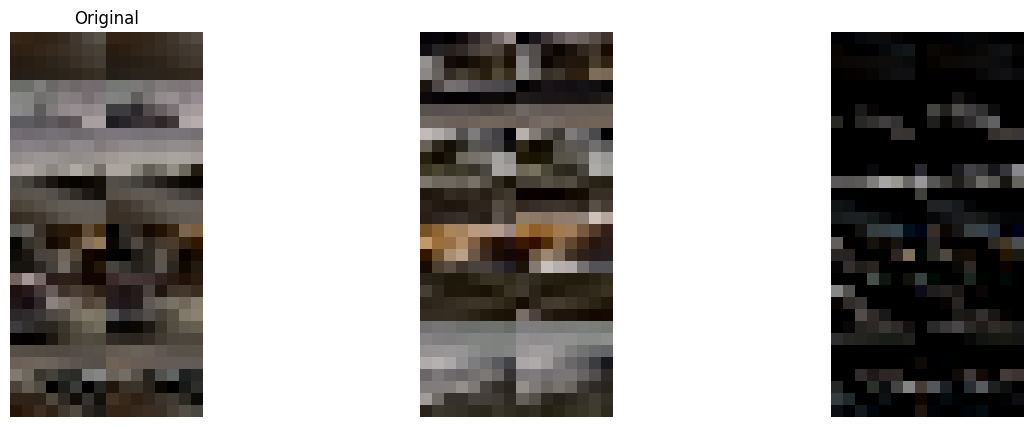

In [35]:
image = cv2.imread("/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE/1000 (10).jpg")
rich_image, poor_image = smash_reconstruction(image)
filtered_images = high_pass(rich_image)
plot_images(rich_image, [poor_image, filtered_images[7]])

In [54]:
from PIL import Image

class dataset(Dataset): #dataset class
    def __init__(self, li, transform=None):
        super().__init__()
        self.li = li
        self.transform = transform
    
    def __len__(self):
        return len(self.li)
    
    def __getitem__(self, index):
        image_path, label = self.li[index]
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = Image.fromarray(img)  
        
        if self.transform is not None:
            img = self.transform(img)
        
        rich_img, poor_img = smash_reconstruction(img, patch_size=16) 
        rich = torch.from_numpy(concat_high_pass(high_pass(rich_img)))
        poor = torch.from_numpy(concat_high_pass(high_pass(poor_img)))
        
        return {
            'rich': rich.permute(2, 0, 1),
            'poor': poor.permute(2, 0, 1),
            'label': label
        }

# **Augmentations**

In [55]:
# Augmentations as mentioned in CNNSpot
import torch
import torchvision.transforms as T
import PIL
import cv2
import numpy as np
from PIL import Image
import io
import random
from typing import Optional

class JPEGCompression:
    def __init__(self, quality_range=(30, 100), p=0.5, use_pil_jpeg=True):
        self.quality_range = quality_range
        self.p = p
        self.use_pil_jpeg = use_pil_jpeg
    
    def __call__(self, img):
        if random.random() > self.p:
            return img
            
        quality = random.randint(self.quality_range[0], self.quality_range[1])
        
        if self.use_pil_jpeg:

            buffer = io.BytesIO()
            img.save(buffer, format='JPEG', quality=quality)
            buffer.seek(0)
            img = Image.open(buffer)
        else:

            img_np = np.array(img)
            encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
            _, encoded_img = cv2.imencode('.jpg', cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR), encode_param)
            decoded_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
            img = Image.fromarray(cv2.cvtColor(decoded_img, cv2.COLOR_BGR2RGB))
            
        return img

class RandomGaussianBlur:
    def __init__(self, sigma_range=(0, 3), p=0.5):
        self.sigma_range = sigma_range
        self.p = p
    
    def __call__(self, img):
        if random.random() > self.p:
            return img
            
        sigma = random.uniform(self.sigma_range[0], self.sigma_range[1])
        return img.filter(PIL.ImageFilter.GaussianBlur(radius=sigma))


def get_transforms(augmentation_type: str = "blur+jpeg_0.5") -> tuple:
    """
    Get training and testing transforms based on specified augmentation type for 32x32 images.
    
    Args:
        augmentation_type: One of "no_aug", "gaussian_blur", "jpeg", "blur+jpeg_0.5", "blur+jpeg_0.1"
    
    Returns:
        tuple: (train_transform, test_transform)
    """
    # Base transforms that are always applied
    base_transform = [
        T.RandomHorizontalFlip(p=0.2),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
    
    # Test transform (no augmentations)
    test_transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Add augmentations based on type
    if augmentation_type == "no_aug":
        train_transform = base_transform
    
    elif augmentation_type == "gaussian_blur":
        train_transform = [RandomGaussianBlur(p=0.5)] + base_transform
    
    elif augmentation_type == "jpeg":
        train_transform = [
            JPEGCompression(p=0.5, use_pil_jpeg=random.choice([True, False]))
        ] + base_transform
    
    elif augmentation_type == "blur+jpeg_0.5":
        train_transform = [
            RandomGaussianBlur(p=0.5),
            JPEGCompression(p=0.5, use_pil_jpeg=random.choice([True, False]))
        ] + base_transform
    
    elif augmentation_type == "blur+jpeg_0.2":
        train_transform = [
            RandomGaussianBlur(p=0.2),
            JPEGCompression(p=0.2, use_pil_jpeg=random.choice([True, False]))
        ] + base_transform
    
    else:
        raise ValueError(f"Unknown augmentation type: {augmentation_type}")
    
    return T.Compose(train_transform), test_transform

def load_and_transform_image(image_path: str, transform: T.Compose) -> torch.Tensor:
    """
    Load and transform an image from a path.
    
    Args:
        image_path: Path to the image
        transform: Transformation to apply
    
    Returns:
        torch.Tensor: Transformed image
    """
    img = Image.open(image_path).convert('RGB')
    return transform(img)

In [56]:
train_transform, test_transform = get_transforms(augmentation_type="blur+jpeg_0.2")

# **Dataset and Dataloader**

In [57]:
train_data = dataset(train_li)
test_data = dataset(test_li)

In [58]:
train_load = DataLoader(train_data, shuffle=True, batch_size=32)
test_load = DataLoader(test_data, shuffle=False, batch_size=32)

In [59]:
iterator = iter(train_load)
a, b, c = next(iterator).values()
a.shape

torch.Size([32, 90, 32, 16])

# **Model Architecture**

In [60]:
class Residual(nn.Module): # Model to generate residuals of an image
    def __init__(self):
        super().__init__()
        self.poor_cnn = nn.Sequential(
            nn.Conv2d(90, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.Hardtanh()
        )
        self.rich_cnn = nn.Sequential(
            nn.Conv2d(90, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.Hardtanh()
        )
    
    def forward(self, rich, poor):
        rich = rich.float()
        poor = poor.float()
        rich = self.rich_cnn(rich)
        poor = self.poor_cnn(poor)
        residual = rich - poor
        return residual

In [61]:
class Classifier(nn.Module): #Classification model based on the residuals of an image
    def __init__(self):
        super().__init__()
        
        self.features = nn.Sequential(
            # Convolutional Block 1
            nn.Conv2d(64, 32, kernel_size=3, padding=1),  
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.AvgPool2d(kernel_size=2),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.AvgPool2d(kernel_size=2),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.AvgPool2d(kernel_size=2),

            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fc = nn.Linear(64, 2)
        
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [62]:
n_epochs = 10
residual = Residual().to(device)
classifier = Classifier().to(device)

# Combine the parameters of both models for the optimizer
params = list(residual.parameters()) + list(classifier.parameters())
optimizer = torch.optim.Adam(params, weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()
accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=2).to(device)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3, steps_per_epoch=len(train_load), epochs=n_epochs
)

# **Training Loop**

In [ ]:
best_val_accuracy = 0.0  # Initialize the best validation accuracy

for epoch in range(n_epochs):
    residual.train()
    classifier.train()
    train_loss = 0.0
    accuracy_metric.reset()  

    for batch in tqdm(train_load):

        rich = batch['rich'].to(device)
        poor = batch['poor'].to(device)
        labels = batch['label'].to(device)

        # Forward pass through the Residual and Classifier
        residual_output = residual(rich, poor)
        predictions = classifier(residual_output)

        loss = loss_fn(predictions, labels)
        train_loss += loss.item() / len(train_load)

        accuracy_metric.update(predictions, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Compute overall training accuracy for this epoch
    train_accuracy = accuracy_metric.compute().item()

    # Update learning rate
    scheduler.step()

    # Print training loss and accuracy
    print(f"Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluation phase
    residual.eval()
    classifier.eval()
    accuracy_metric.reset()  # Reset metric for validation accuracy

    with torch.no_grad():
        for batch in tqdm(test_load):
            rich = batch['rich'].to(device)
            poor = batch['poor'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            residual_output = residual(rich, poor)
            predictions = classifier(residual_output)

            # Update validation accuracy
            accuracy_metric.update(predictions, labels)

    # Compute validation accuracy
    val_accuracy = accuracy_metric.compute().item()
    print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy:.4f}")

    # Save model with epoch number and validation accuracy in the filename
    model_filename = f"model_epoch_{epoch+1}_val_{val_accuracy:.4f}.pth"
    torch.save({
        'residual_state_dict': residual.state_dict(),
        'classifier_state_dict': classifier.state_dict(),
    }, model_filename)
    print(f"Model saved as {model_filename}")